# Generating Mock Data for Spatial Data Science

*Mock data is useful to design new experiments, test new analytical techniques, evaluating the performance of data systems, and to generally get a handle on a new analytical problem, among other things. In some instances, mock data is the goal - think video games or other virtual worlds that need to have endless horizons. In other cases, mock data is to help us think through a problem or test a system. This later case is our primary use in spatial data science, where mock data helps us think through the data modeling challenge. Specifically, it helps us think about the pros and cons of different approaches to problem formulation, abstraction, and representation of the spatial entities and their attributes.*

Last updated: Oct 12, 2023

In [1]:
# Imports
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import LineString, Point, Polygon

# Multivariate Distributions

### Points

In [2]:
# Define the bounding box (extent)
xmin, ymin, xmax, ymax = (0, 0, 10, 10)

# Generate random point coordinates
num_points = 25

x = np.random.uniform(xmin, xmax, num_points)
y = np.random.uniform(ymin, ymax, num_points)

In [3]:
# Create a GeoDataFrame from the random points
point_geometry = [Point(x[i], y[i]) for i in range(num_points)]

point_gdf = gpd.GeoDataFrame(geometry=point_geometry)

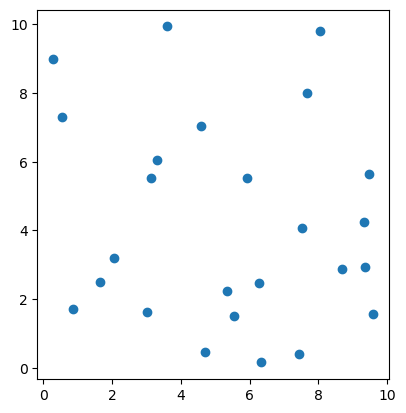

In [4]:
# Plot
point_gdf.plot();

### Lines

In [5]:
# Define the bounding box (extent)
xmin, ymin, xmax, ymax = (0, 0, 10, 10)

# Generate random point coordinates
num_lines = 5

lines = []

for i in range(num_lines):
    # Calculate Number of Vertices in Line
    num_points_in_line = np.random.randint(2, 10)
    
    # Calculate Coordinates for each Vertex
    line_coords = [(np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)) for _ in range(num_points_in_line)]
    
    # Append Vertices to List
    lines.append(LineString(line_coords))

In [6]:
# Create a GeoDataFrame from the random lines
line_gdf = gpd.GeoDataFrame(geometry=lines)

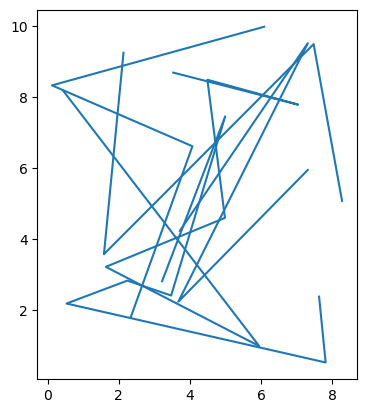

In [7]:
# Plot
line_gdf.plot();

### Polygons

In [8]:
# Compute a Voronoi Diagram (Thiessen Polygons) using points from above
vor = Voronoi(np.array([[point.x, point.y] for point in point_geometry]))

# Extract the polygons
polygons = []

for region in vor.regions:
    if len(region) > 0 and -1 not in region:
        polygon_coords = [vor.vertices[i] for i in region]
        polygons.append(Polygon(polygon_coords))

In [9]:
# Create a GeoDataFrame from the polygons
poly_gdf = gpd.GeoDataFrame(geometry=polygons)

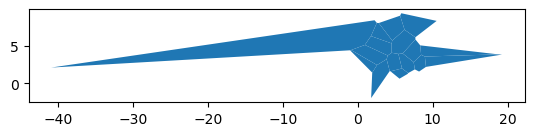

In [10]:
# Plot
poly_gdf.plot();

### Lines from Polygons

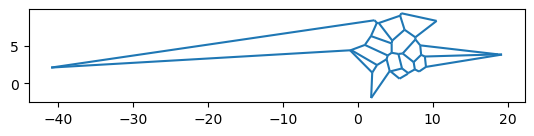

In [11]:
voronoi_lines = []

for edge in vor.ridge_vertices:
    if -1 not in edge:
        line_coords = [vor.vertices[i] for i in edge]
        voronoi_lines.append(LineString(line_coords))

# Create a GeoDataFrame from the Voronoi lines
line_gdf_from_poly = gpd.GeoDataFrame(geometry=voronoi_lines)

# Plot
line_gdf_from_poly.plot();

### Rasters

In [12]:
# Define array dimensions
rows, cols = 100, 100

# Generate random values between 0 and 100
raster_data = np.random.uniform(0, 100, (rows, cols))

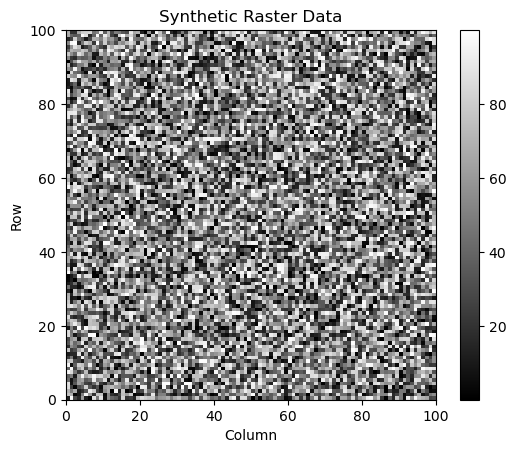

In [13]:
# Plot the data as a grayscale image
plt.imshow(raster_data, cmap='gray', extent=(0, cols, 0, rows), origin='lower')
plt.colorbar()
plt.title('Synthetic Raster Data')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

### Categorical Rasters

In [14]:
# Define the categories and their corresponding values
forest_value = 1
grassland_value = 2
urban_value = 3
water_value = 4

# Create a synthetic land cover array with random categories
categorical_raster_data = np.random.choice([forest_value, grassland_value, urban_value, water_value], (rows, cols))

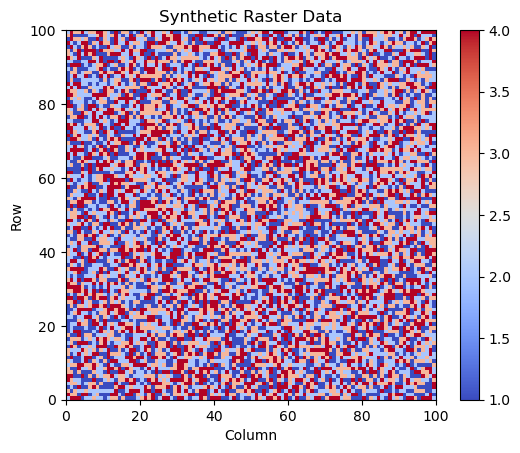

In [15]:
# Plot the data as a grayscale image
plt.imshow(categorical_raster_data, cmap='coolwarm', extent=(0, cols, 0, rows), origin='lower')
plt.colorbar()
plt.title('Synthetic Raster Data')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

### Points with Attributes

In [16]:
# Using Previous Points GDF
mean = 1000
std_dev = 200
point_gdf['attribute_1'] = np.random.normal(mean, std_dev, num_points)

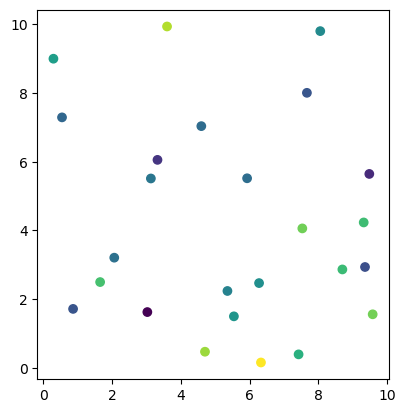

In [17]:
point_gdf.plot(column='attribute_1');